In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import altair as alt

In [2]:
cps = pd.read_stata(
    "https://github.com/nickeubank/MIDS_Data/blob/master"
    "/Current_Population_Survey/cps_for_matching.dta?raw=true"
)

In [3]:
cps.head()

,index,annual_earnings,female,simplified_race,has_college,age,county,class94
0,151404,NaN,1,3.0,1,30,0-WV,"Private, For Profit"
1,123453,NaN,0,0.0,0,21,251-TX,"Private, For Profit"
2,187982,NaN,0,0.0,0,40,5-MA,"Self-Employed, Unincorporated"
3,122356,NaN,1,0.0,1,27,0-TN,"Private, Nonprofit"
4,210750,42900.0,1,0.0,0,52,0-IA,"Private, For Profit"


## Exercise 1

In [6]:
annual_earnings_with_college = cps.loc[cps['has_college']==1, 'annual_earnings']
annual_earnings_without_college = cps.loc[cps['has_college']==0, 'annual_earnings']

raw_diff = annual_earnings_with_college.mean() - annual_earnings_without_college.mean()
print(f'The raw difference of annual_earnings between those with and without a college degree {raw_diff:.2f}')

The raw difference of annual_earnings between those with and without a college degree 14158.50


In [10]:
_, pvalue = stats.ttest_ind(annual_earnings_with_college, annual_earnings_without_college, nan_policy='omit')
print(f'The p-value for the t-test is {pvalue:.2f}')

The p-value for the t-test is 0.00


The difference is statistically significant

## Exercise 2

In [11]:
cps['simplified_race'].value_counts()

0.0    7622
2.0    1512
1.0    1020
3.0     996
Name: simplified_race, dtype: int64

In [12]:
cross_tab = pd.crosstab(cps['simplified_race'], cps['has_college'])
_, p, _, _ = stats.chi2_contingency(cross_tab)
print(f"P-value for chi-square test: {p:.2f}")

P-value for chi-square test: 0.00


array(['0-WV', '251-TX', '5-MA', '0-TN', '0-IA', '0-NV', '0-SC', '0-GA',
       '0-VT', '0-MT', '0-CO', '119-NC', '35-NJ', '0-ND', '5-NY', '0-TX',
       '0-NE', '29-PA', '61-CA', '0-MS', '47-NY', '0-OH', '27-NJ',
       '19-AZ', '0-SD', '0-CA', '0-UT', '0-NY', '13-AZ', '37-CA', '0-NJ',
       '49-NM', '86-FL', '0-MN', '3-DE', '101-FL', '0-NM', '13-MA',
       '0-AL', '0-IN', '17-MA', '0-ID', '810-VA', '0-OK', '439-TX',
       '81-CA', '59-CA', '3-PA', '57-FL', '5-DE', '0-AR', '53-FL',
       '89-OH', '125-TN', '33-MD', '3-NV', '49-PA', '0-PA', '95-FL',
       '0-KY', '103-NY', '3-AL', '25-MA', '0-VA', '99-FL', '163-MI',
       '99-MI', '1-DC', '103-OH', '0-LA', '0-AK', '31-MD', '0-FL',
       '105-FL', '33-WA', '73-CA', '0-MI', '13-VA', '0-KS', '19-PA',
       '97-IL', '0-IL', '27-MA', '1-CA', '17-PA', '0-WY', '0-CT', '13-NM',
       '139-WI', '19-ME', '11-NH', '125-MI', '0-NC', '99-CA', '0-WA',
       '3-HI', '67-CA', '479-TX', '109-FL', '85-NY', '103-FL', '0-RI',
       '0-HI', '39-

In [22]:
l_avg = []
l_std = []
for i in cps['county'].unique():
    
    l_avg.append(cps.loc[cps['county']==i, 'annual_earnings'].mean())
    l_std.append(cps.loc[cps['county']==i, 'annual_earnings'].std())


Text(0, 0.5, 'Standard Deviation of Annual Earnings')

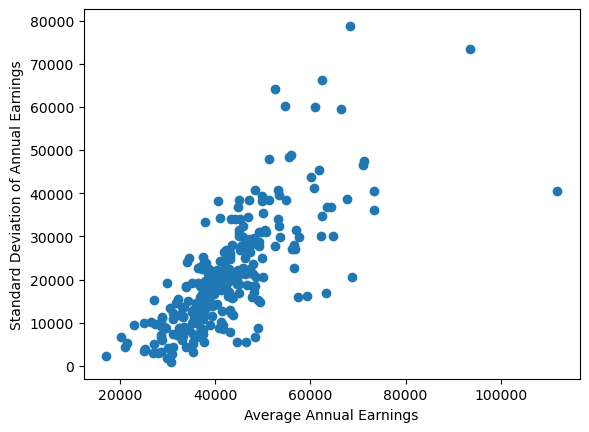

In [24]:
plt.scatter(l_avg, l_std)
plt.xlabel('Average Annual Earnings')
plt.ylabel('Standard Deviation of Annual Earnings')


not balanced

### Exercise 3

In [27]:
alt.data_transformers.disable_max_rows()
base = (
    alt.Chart(cps).mark_point().encode(
        x = 'age',
        y = 'annual_earnings',
    )
)

loess = base.transform_loess(
    'age', 'annual_earnings').mark_line(color='red')

base + loess


e:\miniconda3\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)